# Introduction to Data Science
## Homework 3

Student Name: Fu Shang

Student Netid: fs1520

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

![Homework3_fs1520_part1.jpg](file:D:/1_Study/Homework3_fs1520_part1.jpg)
-please check the attachment Homework3_fs1520_part1.pdf

### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the target variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [6]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier

In [4]:
#ccd=pd.read_csv('C:/Users/JsFig/OneDrive/NYU 17/1001/HW/cell2cell_data.csv',sep=',')
tmp=np.loadtxt('C:/Users/JsFig/OneDrive/NYU 17/1001/HW/cell2cell_data.csv', dtype=np.float,delimiter=',')
C=['revenue','outcalls','incalls','months','eqpdays','webcap','marryyse','travel','pcown','creditcd','retcalls','churndep']
df=pd.DataFrame(columns=C,data=tmp)
train_np=tmp
cter=len(df)
cttd=int(0.2*cter)
for k in range(cttd):
    r=np.random.randint(len(train_np))
    #print(r)
    if 'test_np' not in dir(): #test if test_np exists
        test_np=([train_np[r]])
    test_np=np.vstack((test_np,train_np[r]))
    train_np=np.delete(train_np,r,0) #delete row r in train
train_df=pd.DataFrame(columns=C,data=train_np)
test_df=pd.DataFrame(columns=C,data=test_np)
#test_df.describe().T
# Code here

2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

<font face="Black" size=5>Answer:</font><br>
If P(S|X,Y)=P(S), the selection is unbiased. I can use a random number from in the [0,1) interval, multiply it by the total line number 39859 to choose a line in the original data set, and see the sample's probability of falling into the two splited data sets. With the number of trails increased, the probability will be approaching 0.2:0.8 .

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [11]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
Y=train_df['churndep']
X=train_df.drop('churndep',1)
dt.fit(X,Y)
feature_mi=dt.feature_importances_
feature_mi_dict=dict(zip(X.columns.values,feature_mi))
# Code here

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

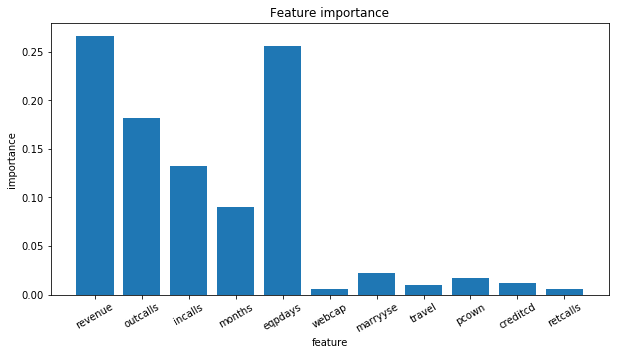

In [127]:
import matplotlib.pyplot as plt
%matplotlib inline
# Code here
feature_mi_pd=pd.DataFrame(index=X.columns.values,data=feature_mi[:np.newaxis])
fig,ax=plt.subplots(figsize=(10,5))
vt=[x for x in range(1,12,1)]
y=np.array(list(feature_mi_pd[0]))

xstick1=list(X.columns.values)
#print(xstick1)
ax.set_xticks(vt)
ax.set_xticklabels(X.columns.values,rotation=30)
#xticklables=(vt,[i for i in xstick1])
ax.bar(vt,y)
plt.xlabel('feature')
plt.ylabel('importance')
plt.title('Feature importance')
plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [10]:
# Code/answer here
cr_r_e=np.corrcoef(df['revenue'],df['eqpdays'])[1,0]
cr_r_o=np.corrcoef(df['revenue'],df['outcalls'])[1,0]
cr_e_o=np.corrcoef(df['eqpdays'],df['outcalls'])[1,0]
cr_r_c=np.corrcoef(df['revenue'],df['churndep'])[1,0]
cr_e_c=np.corrcoef(df['eqpdays'],df['churndep'])[1,0]
cr_o_c=np.corrcoef(df['outcalls'],df['churndep'])[1,0]
print('CR between "revenue" and "eqpdays": ',cr_r_e)
print('CR between "revenue" and "outcalls": ',cr_r_o)
print('CR between "eqpdays" and "outcalls": ',cr_e_o)
print('CR between "revenue" and "churndep": ',cr_r_c)
print('CR between "eqpdays" and "churndep": ',cr_e_c)
print('CR between "outcalls" and "churndep": ',cr_o_c)

CR between "revenue" and "eqpdays":  -0.221958035997
CR between "revenue" and "outcalls":  0.500870373178
CR between "eqpdays" and "outcalls":  -0.243999251958
CR between "revenue" and "churndep":  -0.0135660818676
CR between "eqpdays" and "churndep":  0.112730993316
CR between "outcalls" and "churndep":  -0.037233028525


<font face="Black" size=5>Answer:</font><br>
The relationship between 'revenue' and 'eqpdays' and that of 'eqpdays' and 'outcalls' are negative, while 'revenue' has a positive relationship with 'outcalls'. Although the correlation between the three features and churn is relatively small, 'eqpdays' has a positive effect on churn while the other two has a negative effect on it. It's possibly because the company's outcall service is highly qualified, so the customers who always make a international dialing prefers to choose the company. More outcalls means more revenue since the cost of every minute call is higher, so more outcalls makes more revenue and less churn. However, eqpdays has a negative relation with outcalls and a positive effect on churn. It might be true that many customers were just arriving at the U.S. from abroad when they chose the company's service. The longer they lived in the country(i.e. they used their new device for longer time) the less international dailings they are willing to make since their main social relations changed from their homeland to the U.S.

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? If they are different, can you explain the difference?

In [29]:
# Code here
Yt=test_df['churndep']
Xt=test_df.drop('churndep',1)
X_pred=dt.predict(X)
Xt_pred=dt.predict(Xt)
AcX_Y=dt.score(X,Y)
AcXt_Yt=dt.score(Xt,Yt)
print('Accuracy on train_df and Y: ',AcX_Y)
print('Accuracy on test_df and Y:',AcXt_Yt)

Accuracy on train_df and Y:  0.999843201204
Accuracy on test_df and Y: 0.539262418465


<font face="Black" size=5>Explaination:</font><br>
Because the data used for training is highly consistent with the decision tree built, so the accuracy could be very high. While the training process didn't involve the test dataset, those data is new for the tree, so the accuracy reduces significantly.

### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters mim_samples_split and min_samples_leaf. 

In [57]:
# Code here

#min_samples_split_values = [x for x in range(2,12,1)]
#min_samples_leaf_values = [x for x in range(1,11,1)]
#min_samples_split_values = [2,4,8,16,32,64,128,256,512,1024]
#min_samples_leaf_values = [2,4,8,16,32,64,128,256,512,1024]
min_samples_split_values = [3,6,9,27,81,243,729,2187,6561,19683]
min_samples_leaf_values = [3,6,9,27,81,243,729,2187,6561,19683]

2\. Explain in words your reasoning for choosing the above ranges.

<font face="Black" size=5>Answer:</font><br>
Small split and leaf thresholds might result in overfitting. When calculating, if the number of observations in the node is lower than minimum split size, the decition tree will stop splitting; while if the number of observations in any child nodes of the current node turned to be lower than the minimum leaf size, the tree will also stop splitting. I tested several combinations, and found the current ranges could show the tendency of accuracy change best.

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

In [58]:
Cac=[x for x in range(1,11,1)]
Dac=np.zeros((10,10))
ac_df_2=pd.DataFrame(columns=min_samples_leaf_values,index=min_samples_split_values,data=Dac)
for lvs in min_samples_leaf_values:
    for spl in min_samples_split_values:
        dtest=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=lvs,min_samples_split=spl)
        dtest.fit(X,Y)
        ActestXt_Yt=dtest.score(Xt,Yt)
        ac_df_2[lvs][spl]=ActestXt_Yt

In [59]:
ac_df_2

,3,6,9,27,81,243,729,2187,6561,19683
3,0.535248,0.532865,0.540893,0.556071,0.572629,0.591194,0.586804,0.588435,0.581912,0.490843
6,0.531485,0.531485,0.541395,0.556322,0.572629,0.591194,0.586804,0.588435,0.581912,0.490843
9,0.531234,0.532112,0.541520,0.556698,0.572629,0.591194,0.586804,0.588435,0.581912,0.490843
27,0.539890,0.544656,0.547792,0.556448,0.572629,0.591194,0.586804,0.588435,0.581912,0.490843
81,0.555444,0.558705,0.557451,0.560336,0.572629,0.591194,0.586804,0.588435,0.581912,0.490843
243,0.579654,0.578525,0.577145,0.575765,0.576643,0.591194,0.586804,0.588435,0.581912,0.490843
729,0.590818,0.591194,0.591320,0.593201,0.589689,0.591320,0.586804,0.588435,0.581912,0.490843
2187,0.595961,0.595835,0.595710,0.596086,0.594581,0.594330,0.586804,0.588435,0.581912,0.490843
6561,0.592449,0.592449,0.592449,0.592449,0.592449,0.592449,0.592449,0.592449,0.581912,0.490843
19683,0.581912,0.581912,0.581912,0.581912,0.581912,0.581912,0.581912,0.581912,0.581912,0.490843


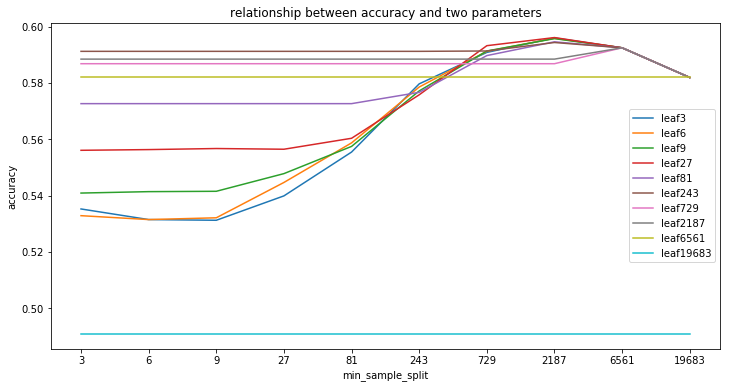

In [149]:
import matplotlib.pyplot as plt
from matplotlib.pylab import datestr2num
%matplotlib inline
fig,ax=plt.subplots(figsize = (12, 6))
xplt=[z for z in range(1,20000,2200)]
xplt_out=[z for z in min_samples_split_values]
yplt=ac_df_2[3]
#plt.set_xticks=(np.arange(10),xplt)
for i in range(10):
    ax.plot(xplt, ac_df_2[min_samples_leaf_values[i]], label='leaf{}'.format(min_samples_leaf_values[i]))
ax.set_xticks(xplt)
ax.set_xticklabels(xplt_out)
ax.set_ylabel('accuracy')
ax.set_xlabel('min_sample_split')
ax.set_title('relationship between accuracy and two parameters')
plt.legend()
plt.show()
# Code here

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [150]:
# Code here
xx=np.array(ac_df_2)
re=np.where(xx==np.max(xx))
print('min_sampels_leaf=',min_samples_leaf_values[re[1][0]])
print('min_sampels_split=',min_samples_split_values[re[0][0]])
print('best accuracy=',ac_df_2[min_samples_leaf_values[re[1][0]]][min_samples_split_values[re[0][0]]])

min_sampels_leaf= 27
min_sampels_split= 2187
best accuracy= 0.596086302057


<font face="Black" size=5>Answer:</font><br>
When min_samples_leaf=27 and min_samples_split=2187, we could acquire the best accuracy which is 0.596086302057.

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

<font face="Black" size=5>Answer:</font><br>
With the decision tree built and trained, it is clear that some features, such as eqpdays and outcalls, are related to a customer's probability of churning. Thus makes it possible for predicting future churn with the model. The company could grasp their target customers by pushing accurate ads about their international call services to those who needs it, and offer coupons to those who is predicted to churn in the future.